In [3]:
# Install necessary libraries (if not already installed)
!pip install pandas numpy nltk wordcloud seaborn scikit-learn textblob matplotlib


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 6.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

# Load the dataset
file_path = "Spam NLP data set.csv"  # Update with the correct path
df = pd.read_csv(file_path, encoding="latin-1")

# Display basic info and first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Keep only relevant columns
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})

# Convert labels to binary (spam = 1, ham = 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check for missing values
df.isnull().sum()

# Display first few rows
df.head()



,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stemming & stopword removal
    return ' '.join(words)

# Apply preprocessing
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Show sample cleaned messages
df[['message', 'cleaned_message']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adeed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


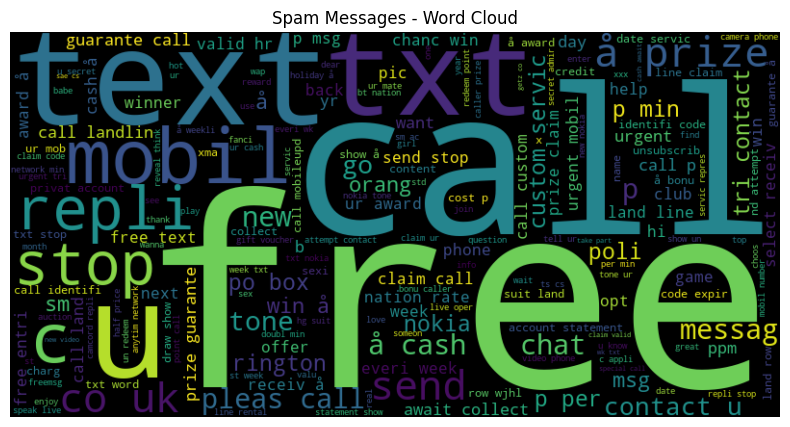

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud for spam messages
spam_words = ' '.join(df[df['label'] == 1]['cleaned_message'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Spam Messages - Word Cloud")
plt.show()


C:\Users\adeed\AppData\Local\Temp\ipykernel_31040\662352192.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='N-gram', data=df_ngrams, palette='viridis')


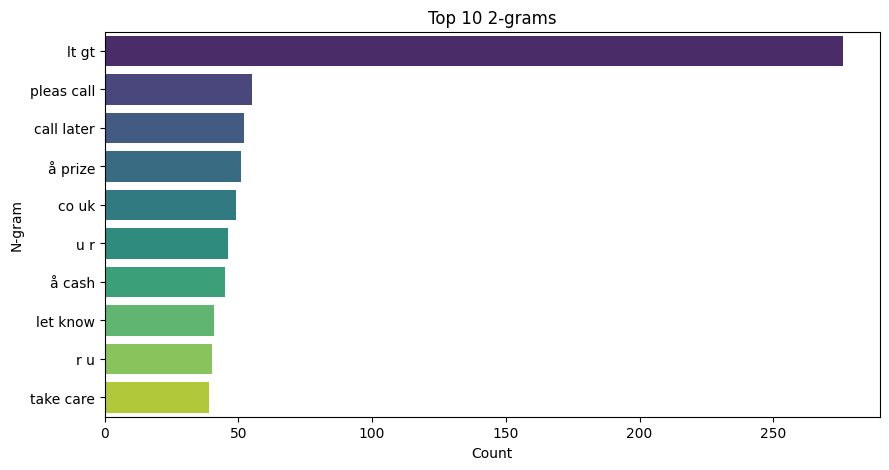

In [8]:
from collections import Counter
import seaborn as sns

# Function to extract and plot top n-grams
def plot_top_ngrams(text_series, n=2, top_k=10):
    words = ' '.join(text_series).split()
    ngrams = [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]
    common_ngrams = Counter(ngrams).most_common(top_k)
    
    # Plot
    df_ngrams = pd.DataFrame(common_ngrams, columns=['N-gram', 'Count'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Count', y='N-gram', data=df_ngrams, palette='viridis')
    plt.title(f"Top {top_k} {n}-grams")
    plt.show()

# Plot bigrams
plot_top_ngrams(df['cleaned_message'], n=2, top_k=10)


C:\Users\adeed\AppData\Local\Temp\ipykernel_31040\662352192.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='N-gram', data=df_ngrams, palette='viridis')


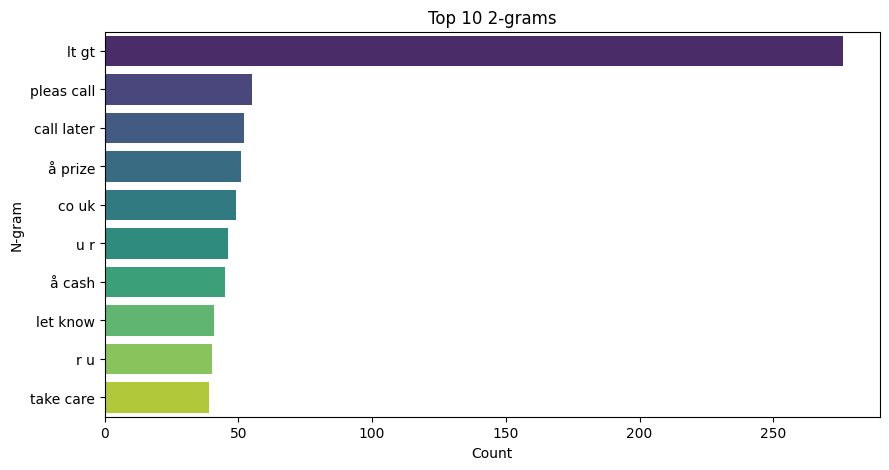

In [9]:
from collections import Counter
import seaborn as sns

# Function to extract and plot top n-grams
def plot_top_ngrams(text_series, n=2, top_k=10):
    words = ' '.join(text_series).split()
    ngrams = [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]
    common_ngrams = Counter(ngrams).most_common(top_k)
    
    # Plot
    df_ngrams = pd.DataFrame(common_ngrams, columns=['N-gram', 'Count'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Count', y='N-gram', data=df_ngrams, palette='viridis')
    plt.title(f"Top {top_k} {n}-grams")
    plt.show()

# Plot bigrams
plot_top_ngrams(df['cleaned_message'], n=2, top_k=10)


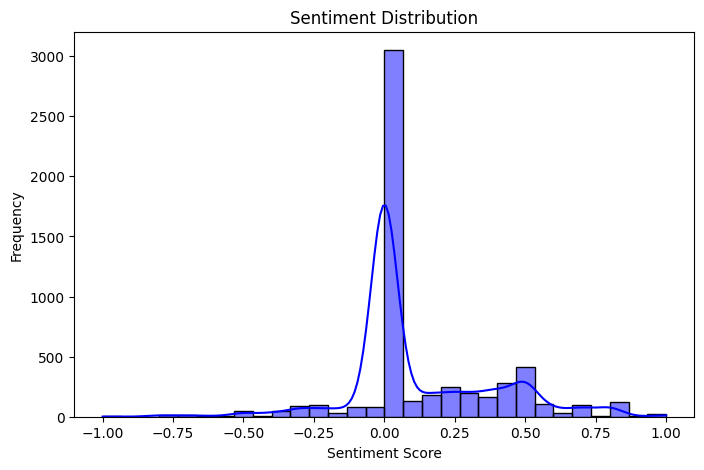

In [10]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_message'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], bins=30, kde=True, color='blue')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000
X = vectorizer.fit_transform(df['cleaned_message'])

# Convert to DataFrame
X_features = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display first few feature vectors
X_features.head()


,____,aa,aah,aathi,aberdeen,abi,abil,abiola,abj,abl,...,ìï,û_,û_thank,ûªm,ûªt,ûªve,ûï,ûïharri,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
